# Week 1: Day 2 AM // NN Parameters: Initialization & Activation Function

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
from sklearn import datasets

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

 # Weight Initialization

Keras offer multiple ways of weight initialization

In [ ]:
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(3,input_shape=[3], kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
model.add(keras.layers.Dense(3, kernel_initializer=keras.initializers.GlorotUniform(seed=123)))
model.add(keras.layers.Dense(3, kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
model.add(keras.layers.Dense(3, kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=123)))
model.add(keras.layers.Dense(3, kernel_initializer=keras.initializers.Zeros()))

#model.add(keras.layers.Dense(300, activation="relu",kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)))
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
initializer_names = ['RandomNormal','GlorotUniform','GlorotNormal','RandomUniform','Zeros']
for i in range(0,len(model.get_weights()),2):
  print(initializer_names[int(i/2)])
  print(model.get_weights()[i])

RandomNormal
[[ 0.94101506  0.22089136 -0.05864859]
 [-0.6326555   0.6163648  -0.00271228]
 [ 0.04911192  0.07723827 -0.07715525]]
GlorotUniform
[[-0.04798412 -0.22223973 -0.9824271 ]
 [-0.57410717 -0.79084826 -0.6723347 ]
 [-0.54534245 -0.14903617  0.22151732]]
GlorotNormal
[[ 0.51410085 -0.61261296  0.46598858]
 [ 1.1952993  -0.15276097 -0.94813454]
 [-0.7538571  -0.11811214 -0.5824808 ]]
RandomUniform
[[-0.02399206 -0.11111987 -0.49121356]
 [-0.28705359 -0.39542413 -0.33616734]
 [-0.27267122 -0.07451808  0.11075866]]
Zeros
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In details, we can refer to this page https://keras.io/api/layers/initializers to know available initializers.

## Effect of weights

Load sample dataset (Iris)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

Convert numpy to Tensor

In [ ]:
tf.keras.backend.clear_session()
idx_rnd=np.random.permutation(len(X))
idx_train=idx_rnd[0:int(len(X)*0.7)]
idx_valid=idx_rnd[int(len(X)*0.7):]
X_train=tf.gather(X, idx_train)
X_valid=tf.gather(X, idx_valid)

y_train=tf.gather(y, idx_train)
y_valid=tf.gather(y, idx_valid)

In [ ]:
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10,input_shape=[4], kernel_initializer=keras.initializers.GlorotNormal(seed=123),activation='sigmoid'))
model.add(keras.layers.Dense(3, activation="softmax"))

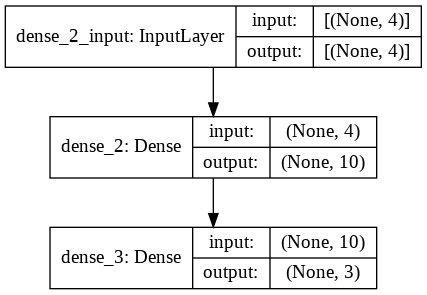

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.15),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [ ]:
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid),verbose=0)

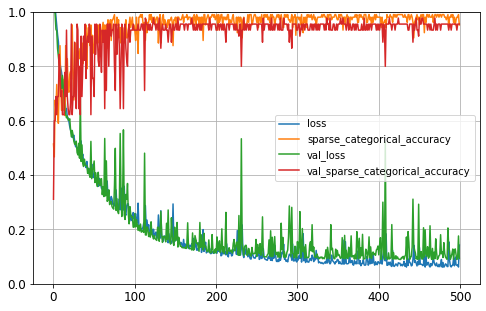

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

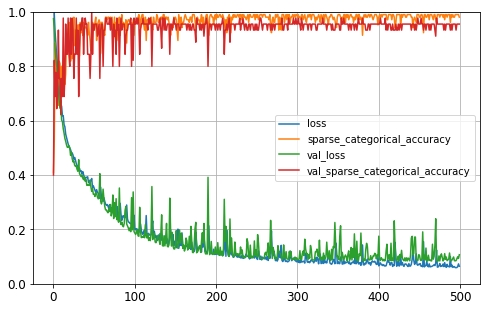

In [ ]:
model2 = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(10,input_shape=[4], kernel_initializer=keras.initializers.RandomUniform(seed=123),activation='sigmoid'))
model2.add(keras.layers.Dense(3, activation="softmax"))

model2.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.15),
              metrics=[keras.metrics.sparse_categorical_accuracy])

history2 = model2.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid),verbose=0)

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

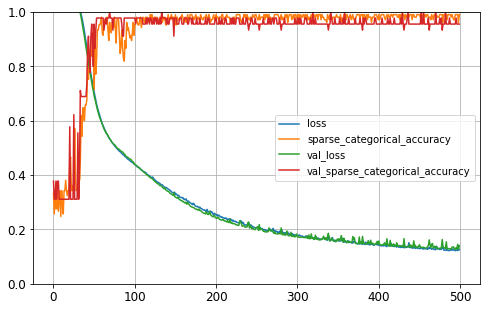

In [ ]:
model3 = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(10,input_shape=[4], kernel_initializer=keras.initializers.Zeros(),activation='sigmoid'))
model3.add(keras.layers.Dense(3, kernel_initializer=keras.initializers.Zeros(), activation="softmax"))

model3.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.15),
              metrics=[keras.metrics.sparse_categorical_accuracy])

history3 = model3.fit(X_train, y_train, epochs=500,
                    validation_data=(X_valid, y_valid),verbose=0)

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Custom weight initialization

# Activation Functions

Activation function is an important part of neural network. Activation function enable us to introduce non-linearity to the model, and as we already learned that non-linearity enable more complex with better capacity to learn.

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

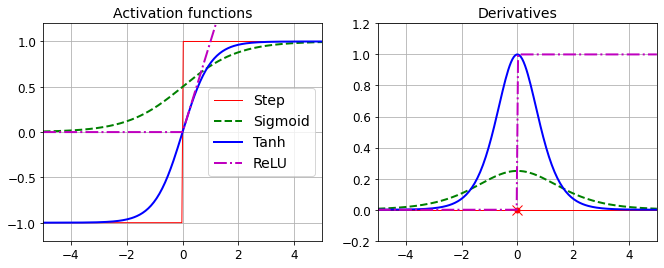

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

Vanishing Gradient

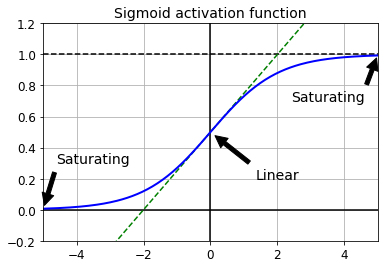

In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

Leaky ReLU

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

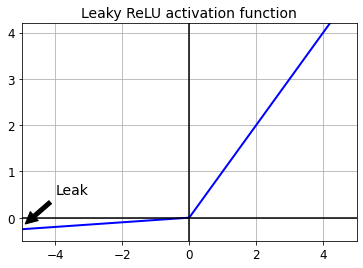

In [ ]:

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

### Batch Normalization

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:

bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

In [ ]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Closer look at Gradient

Gradient Clipping

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:

optimizer = keras.optimizers.SGD(clipnorm=1.0)